In [10]:
import pandas as pd
import bnlearn as bn

In [125]:

# buka file responden
train = pd.read_csv('dataset.csv')

train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Aktivitas Wisata,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
0,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,1,0,0,1
1,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,"Makan Bersama, Mengambil Foto, Beribadah, Berb...",1,0,0,0,1,1,0,0,1
2,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,"Makan Bersama, Belajar, Mengambil Foto, Berbel...",1,0,1,0,1,0,0,0,1
3,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,"Makan Bersama, Mengambil Foto, Berbelanja",1,0,0,0,1,0,0,0,1
4,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1346,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,"Makan, Berolahraga, Belajar, Mengambil Foto, M...",1,1,1,0,1,0,0,1,1
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,"Makan, Berolahraga, Mengambil Foto, Melihat Pe...",1,1,0,0,1,0,0,1,1


In [126]:
drop_list = ['Aktivitas Wisata']

train = train.drop(columns=drop_list)

In [127]:
x= train.drop(['Nama Wisata'], axis=1)
dfnum_target = train['Nama Wisata']


In [128]:
dfhot_train, dfnum_train = bn.df2onehot(x)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 23/23 [00:00<00:00, 168.57it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 23/23 [00:00<00:00, 267.08it/s]

[df2onehot] >Total onehot features: 46


Akurasi:  0.2814814814814815


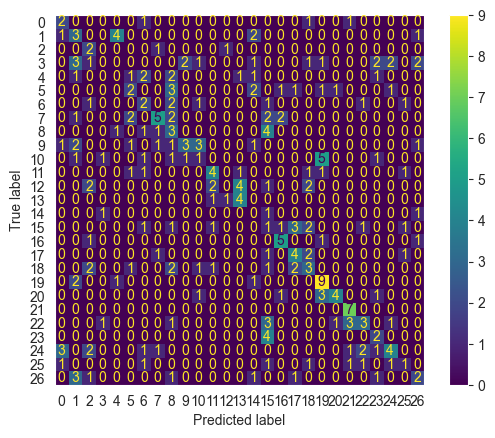

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=10)

from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ""})
print('Akurasi: ', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [130]:
X_test[0:1]

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
442,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,1,0,0,1,0


In [131]:
# predict single data
class_proba = nb.predict_proba(X_test[0:1])

# buat pd data frame pada nb.classes_ dengan nama kolom 'Nama Wisata' dan class proba dengan nama kolom 'Probabilitas'
df = pd.DataFrame(nb.classes_, columns=['Nama Wisata'])
df['Probabilitas'] = class_proba[0]

# sort dataframe berdasarkan probabilitas
df = df.sort_values(by='Probabilitas', ascending=False)
df[0:5]

,Nama Wisata,Probabilitas
8,Kebun Raya Mangrove Gunung Anyar,0.508153
15,Monumen Kapal Selam,0.209317
6,Kampung Pecinaan Kapasan Dalam,0.077416
4,Jatim International Expo (JIE) Convention Exhi...,0.041415
25,Taman Suroboyo,0.028576


In [132]:
X_test[1:2]

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
1144,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0


In [134]:
# buat lagi dengan daata X_test[1:2]
class_proba = nb.predict_proba(X_test[1:2])
df = pd.DataFrame(nb.classes_, columns=['Nama Wisata'])
df['Probabilitas'] = class_proba[0]

df = df.sort_values(by='Probabilitas', ascending=False)
df[0:5]

,Nama Wisata,Probabilitas
13,Masjid Nasional Al Akbar,0.252892
6,Kampung Pecinaan Kapasan Dalam,0.168718
12,Masjid Cheng Ho,0.155069
8,Kebun Raya Mangrove Gunung Anyar,0.144099
7,Kebun Binatang Surabaya,0.086066


In [135]:
X_test[2:3]

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
1184,1,1,1,1,0,1,1,0,0,0,...,1,1,1,0,0,1,0,0,1,1


In [136]:
# buat lagi dengan daata X_test[2:3]
class_proba = nb.predict_proba(X_test[2:3])
df = pd.DataFrame(nb.classes_, columns=['Nama Wisata'])
df['Probabilitas'] = class_proba[0]

df = df.sort_values(by='Probabilitas', ascending=False)
df[0:5]

,Nama Wisata,Probabilitas
10,Kuliner Pecinan Kembang Jepun,0.191399
24,Taman Bungkul,0.187610
6,Kampung Pecinaan Kapasan Dalam,0.118629
9,Kodam Street Food Surabaya,0.108902
8,Kebun Raya Mangrove Gunung Anyar,0.107950


In [137]:
X_test[3:4]

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
102,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [138]:
# buat lagi dengan daata X_test[3:4]
class_proba = nb.predict_proba(X_test[3:4])
df = pd.DataFrame(nb.classes_, columns=['Nama Wisata'])
df['Probabilitas'] = class_proba[0]

df = df.sort_values(by='Probabilitas', ascending=False)
df[0:5]

,Nama Wisata,Probabilitas
24,Taman Bungkul,0.748368
22,Stadion Gelora Bung Tomo,0.085691
25,Taman Suroboyo,0.060252
21,Pusat Olahraga KONI,0.051900
0,Balai Pemuda Alun - Alun Surabaya,0.019859


In [139]:
X_test[4:5]

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
366,1,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [140]:
class_proba = nb.predict_proba(X_test[4:5])
df = pd.DataFrame(nb.classes_, columns=['Nama Wisata'])
df['Probabilitas'] = class_proba[0]

df = df.sort_values(by='Probabilitas', ascending=False)
df[0:5]

,Nama Wisata,Probabilitas
19,Pasar Genteng,0.556860
1,Galaxy Mall Surabaya,0.139409
20,Pasar Pabean,0.125888
26,Tunjungan Plaza,0.065049
9,Kodam Street Food Surabaya,0.050628


In [141]:
# create single data test
evidence = {
    'Escape': 1,
    'Relaxation': 1,
    'Play': 1,
    'Strenghthening family bonds': 1,
    'Prestige': 0,
    'Social Interaction': 1,
    'Romance': 0,
    'Educational Opportunity': 0,
    'Self-fulfilment': 1,
    'Wish-fulfiment': 0,
    'Lingkungan': 1,
    'Infrastruktur': 0,
    'Fasilitas': 1,
    'Akomodasi': 1,
    'Makan Bersama': 1,
    'Berolahraga': 0,
    'Belajar': 0,
    'Berinteraksi dengan satwa': 0,
    'Mengambil Foto': 1,
    'Beribadah': 0,
    'Berkemah': 0,
    'Melihat Pemandangan': 0,
    'Berbelanja': 1
}
# buat evidence ini menjadi dataframe tanpa nama kolom
evidence = pd.DataFrame([evidence])
evidence

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
0,1,1,1,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1


In [142]:
class_proba = nb.predict_proba(evidence)
df = pd.DataFrame(nb.classes_, columns=['Nama Wisata'])

df['Probabilitas'] = class_proba[0]
df = df.sort_values(by='Probabilitas', ascending=False)

df[0:5]

,Nama Wisata,Probabilitas
20,Pasar Pabean,0.487102
1,Galaxy Mall Surabaya,0.115913
3,Jalan Tunjungan,0.096928
9,Kodam Street Food Surabaya,0.075698
19,Pasar Genteng,0.067888
